# **Full Corpus Topic Model and Word Embeddings**

## **DS 5001: Exploratory Text Analytics**

## **Cecily Wolfe (cew4pf)**

## **Spring 2022**

In [1]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly.express as px

In [2]:
from topicmodel import TopicModel

In [3]:
OHCO = ['book_id','chap_id','para_num','sent_num','token_num']

In [4]:
BOW = pd.read_csv("full_BOW.csv")
BOW['term_str'] = BOW['term_str'].astype('str')
BOW = BOW.set_index(['book_id', 'chap_id', 'term_str'])

In [5]:
LIB = pd.read_csv(("full_LIB.csv"), index_col = ['book_id'])

In [6]:
CORPUS = pd.read_csv(("full_CORPUS.csv"), index_col = OHCO)

In [7]:
VOCAB = pd.read_csv("full_VOCAB.csv")

VOCAB['term_str'] = VOCAB['term_str'].astype('str')

VOCAB = VOCAB.set_index('term_str')

VOCAB['pos_group'] = VOCAB.max_pos.str.slice(0,2)

In [8]:
VOCAB.head()

term_rank       n  n_chars         p         i max_pos  n_pos  \
term_str                                                                  
the               1  418963        3  0.052764  4.244302      DT     22   
and               2  310105        3  0.039054  4.678368      CC     20   
of                3  218996        2  0.027580  5.180221      IN     19   
to                4  206700        2  0.026032  5.263587      TO     23   
a                 5  189310        1  0.023842  5.390375      DT     21   

                                                    cat_pos  stop stem_porter  \
term_str                                                                        
the       {'PRP', 'FW', 'RB', 'NN', 'JJS', 'NNP', 'VBZ',...     1         the   
and       {'PRP', 'FW', 'RB', 'PDT', 'NN', 'NNP', 'VBZ',...     1         and   
of        {'PRP', 'FW', 'RB', 'PDT', 'NN', 'NNP', 'VBZ',...     1          of   
to        {'WDT', 'FW', 'RB', 'PDT', 'NN', 'NNP', 'VBZ',...     1          to   
a         {'RBR', 'PRP', 'FW', 'RB', 'NN', 'NNP', 'VBZ',...     1           a   

          ... stem_lancaster term_rank2  zipf_k  zipf_k2  tfidf_mean_chap_max  \
term_str  ...                                                                   
the       ...            the          1  418963   418963             0.001204   
and       ...            and          2  620210   620210             0.001852   
of        ...             of          3  656988   656988             0.000965   
to        ...             to          4  826800   826800             0.000924   
a         ...              a          5  946550   946550             0.001707   

          tfidf_max_chap_max    df       idf     dfidf  pos_group  
term_str                                                           
the                 0.001261  2288  0.001261  2.884130         DT  
and                 0.002522  2286  0.002522  5.765737         CC  
of                  0.001891  2287  0.001891  4.325249         IN  
to                  0.001891  2287  0.001891  4.325249         TO  
a                   0.003785  2284  0.003785  8.644820         DT  

[5 rows x 21 columns]

In [9]:
BOW.head()

n        tf     tfidf
book_id chap_id term_str                       
70      1       1835      1  0.142857  1.262743
                1910      1  0.142857  1.225167
                a         2  0.285714  0.001081
                alphabet  1  0.142857  0.873820
                as        2  0.285714  0.007080

In [10]:
LIB.head()

source_file_path  \
book_id                                                      
70                                Twain/70-what_is_man.txt   
74               Twain/74-the_adventures_of_tom_sawyer.txt   
76         Twain/76-the_adventures_of_huckleberry_finn.txt   
86       Twain/86-a_connecticut_yankee_in_king_arthurs_...   
91                          Twain/91-tom_sawyer_abroad.txt   

                                              title  \
book_id                                               
70                                      what is man   
74                     the adventures of tom sawyer   
76               the adventures of huckleberry finn   
86       a connecticut yankee in king arthurs court   
91                                tom sawyer abroad   

                                                chap_regex author  \
book_id                                                             
70       WHAT IS MAN?|THE DEATH OF JEAN|THE TURNING-POI...  twain   
74                                ^\s*CHAPTER\s*[IVXLCM]+$  twain   
76                 ^\s*CHAPTER\s*(?:[IVXLCM]+\.|THE LAST)$  twain   
86       ^\s*(?:PREFACE|A WORD OF EXPLANATION|THE STRAN...  twain   
91                                    CHAPTER\s[IVXLCM]+\.  twain   

                type  year  decade  n_chaps  book_len  \
book_id                                                 
70       non-fiction  1906    1900       17     96111   
74             novel  1876    1870       35     70276   
76             novel  1884    1880       43    111908   
86             novel  1889    1880       47    119100   
91             novel  1894    1890       13     33969   

                                                     label  
book_id                                                     
70                                   twain 70: what is man  
74                  twain 74: the adventures of tom sawyer  
76            twain 76: the adventures of huckleberry finn  
86       twain 86: a connecticut yankee in king arthurs...  
91                             twain 91: tom sawyer abroad

## **M08: Topic Models**

In [11]:
# join BOW and VOCAB
joint_BOW = BOW.reset_index().set_index('term_str').join(VOCAB, rsuffix = "_vocab")

# remove nan
joint_BOW = joint_BOW.loc[~joint_BOW.isna().any(axis = 1)]

# remove proper nouns
joint_BOW = joint_BOW.loc[~joint_BOW.max_pos.isin(['NNP', 'NNPS'])]

joint_BOW

book_id  chap_id   n        tf     tfidf  term_rank  n_vocab  \
term_str                                                                       
0                   588        7   2  0.040000  0.326445       7549       65   
0                   786       16   1  0.012987  0.105989       7549       65   
0                   882       47   1  0.001244  0.010151       7549       65   
0                   912        3   3  0.005714  0.046635       7549       65   
0                  1414        1  49  0.182836  1.492147       7549       65   
...                 ...      ...  ..       ...       ...        ...      ...   
étouffante        60900        5   1  0.007752  0.086520      50882        1   
évitant            3189        3   1  0.004132  0.046120      50885        1   
êtes               3189        3   1  0.004132  0.046120      50890        1   
öffnen            60900        6   1  0.004608  0.051434      50891        1   
übergeschlagen    60900        6   1  0.004608  0.051434      50895        1   

                n_chars             p          i  ... stem_lancaster  \
term_str                                          ...                  
0                     1  8.186068e-06  16.898398  ...              0   
0                     1  8.186068e-06  16.898398  ...              0   
0                     1  8.186068e-06  16.898398  ...              0   
0                     1  8.186068e-06  16.898398  ...              0   
0                     1  8.186068e-06  16.898398  ...              0   
...                 ...           ...        ...  ...            ...   
étouffante           10  1.259395e-07  22.920766  ...         étouff   
évitant               7  1.259395e-07  22.920766  ...           évit   
êtes                  4  1.259395e-07  22.920766  ...            ête   
öffnen                6  1.259395e-07  22.920766  ...         öffnen   
übergeschlagen       14  1.259395e-07  22.920766  ...     übergeschl   

                term_rank2  zipf_k  zipf_k2 tfidf_mean_chap_max  \
term_str                                                          
0                     1435  490685    93275            0.278472   
0                     1435  490685    93275            0.278472   
0                     1435  490685    93275            0.278472   
0                     1435  490685    93275            0.278472   
0                     1435  490685    93275            0.278472   
...                    ...     ...      ...                 ...   
étouffante            1499   50882     1499            0.086520   
évitant               1499   50885     1499            0.046120   
êtes                  1499   50890     1499            0.046120   
öffnen                1499   50891     1499            0.051434   
übergeschlagen        1499   50895     1499            0.051434   

               tfidf_max_chap_max df        idf      dfidf  pos_group  
term_str                                                               
0                        1.492147  8   8.161132  65.289055         CD  
0                        1.492147  8   8.161132  65.289055         CD  
0                        1.492147  8   8.161132  65.289055         CD  
0                        1.492147  8   8.161132  65.289055         CD  
0                        1.492147  8   8.161132  65.289055         CD  
...                           ... ..        ...        ...        ...  
étouffante               0.086520  1  11.161132  11.161132         NN  
évitant                  0.046120  1  11.161132  11.161132         VB  
êtes                     0.046120  1  11.161132  11.161132         NN  
öffnen                   0.051434  1  11.161132  11.161132         NN  
übergeschlagen           0.051434  1  11.161132  11.161132         NN  

[2213701 rows x 26 columns]

In [12]:
# recover filtered BOW --> drop cols added by VOCAB and reset index to book_id, chap_id, term_str

filtered_BOW = joint_BOW.drop(joint_BOW.loc[:, 'n_vocab':].columns, axis = 1).reset_index().set_index(['book_id', 'chap_id', 'term_str'])

# sort by book id
filtered_BOW = filtered_BOW.sort_values('book_id')

filtered_BOW

n        tf     tfidf  term_rank
book_id chap_id term_str                                     
70      17      theological  1  0.000749  0.005123      14167
        3       vague        1  0.004739  0.015596       2509
        12      article      1  0.062500  0.181779       1280
        2       miserable    5  0.003658  0.008645       1053
        4       miserable    1  0.004065  0.009608       1053
...                         ..       ...       ...        ...
62739   2       buckets      2  0.005556  0.035590      11706
        4       beguiled     1  0.003534  0.018828       8063
                number       1  0.003534  0.006499        638
                afterward    1  0.003534  0.011499       2069
        2       subheadings  1  0.002778  0.031003      58356

[2213701 rows x 4 columns]

In [13]:
# removed ~ 3.5% of data when taking out proper nouns (singular and plural)
(BOW.shape[0] - filtered_BOW.shape[0]) / BOW.shape[0]

0.04075437915339256

In [14]:
n_topics = 40
n_terms = 2000

In [15]:
tm = TopicModel(filtered_BOW)
tm.n_topics = n_topics
tm.n_terms = n_terms

In [16]:
tm.create_X()
tm.get_model()
tm.describe_topics()
tm.get_model_stats()

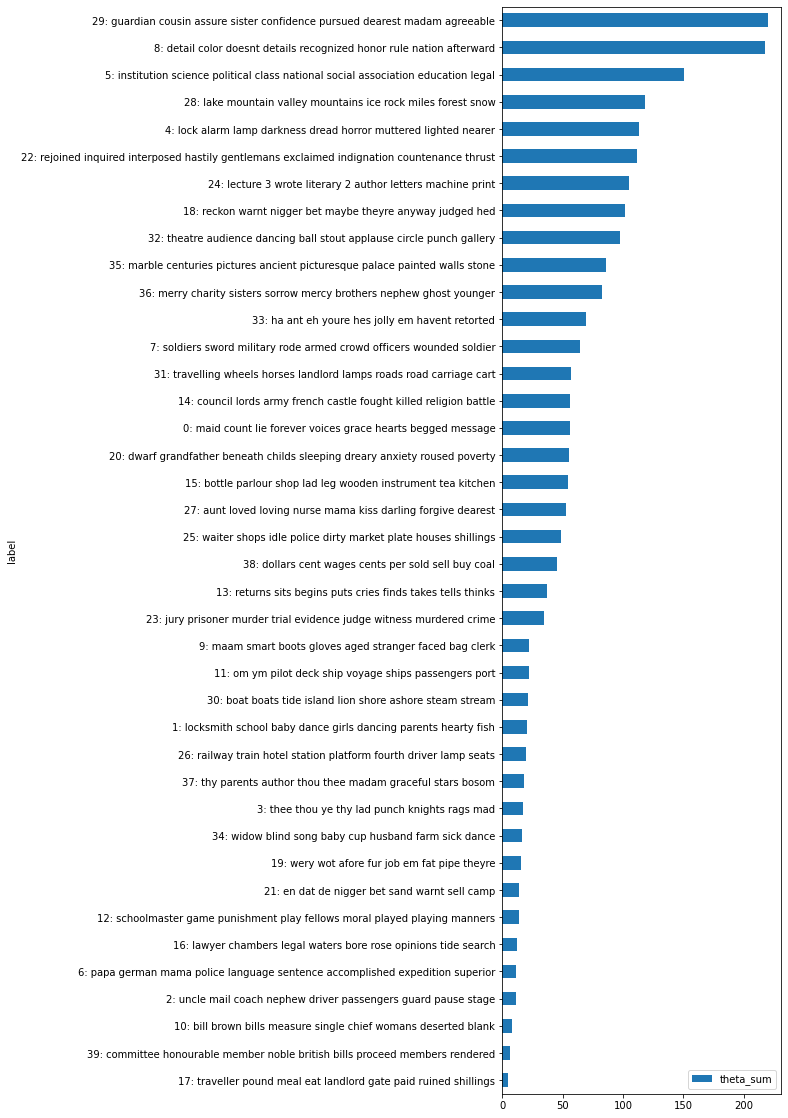

In [17]:
tm.plot_topics()

In [18]:
# table with distribution of topics for each doc
tm.THETA

topic_id               0         1         2         3         4         5   \
book_id chap_id                                                               
70      1        0.002500  0.002500  0.002500  0.002500  0.002500  0.679131   
        2        0.024762  0.000005  0.000005  0.000005  0.000005  0.117217   
        3        0.130919  0.000040  0.000040  0.000040  0.000040  0.000040   
        4        0.000045  0.000045  0.000045  0.005706  0.000045  0.126276   
        5        0.000032  0.000032  0.000032  0.000032  0.000032  0.000032   
...                   ...       ...       ...       ...       ...       ...   
62739   2        0.027685  0.000027  0.000027  0.000027  0.000027  0.167650   
        3        0.068494  0.000269  0.000269  0.088688  0.000269  0.109124   
        4        0.000063  0.000063  0.000063  0.000063  0.000063  0.496019   
        5        0.000179  0.000179  0.000179  0.000179  0.000179  0.654181   
        6        0.000714  0.000714  0.000714  0.000714  0.000714  0.000714   

topic_id               6         7         8         9   ...        30  \
book_id chap_id                                          ...             
70      1        0.002500  0.002500  0.002500  0.002500  ...  0.002500   
        2        0.000005  0.000005  0.210831  0.000005  ...  0.000005   
        3        0.029978  0.000040  0.172546  0.000040  ...  0.000040   
        4        0.000045  0.054103  0.477511  0.000045  ...  0.005885   
        5        0.000032  0.000032  0.411315  0.000032  ...  0.000032   
...                   ...       ...       ...       ...  ...       ...   
62739   2        0.000027  0.204051  0.236223  0.000027  ...  0.000027   
        3        0.000269  0.000269  0.542757  0.000269  ...  0.000269   
        4        0.000063  0.050351  0.088109  0.000063  ...  0.000063   
        5        0.000179  0.066993  0.000179  0.000179  ...  0.000179   
        6        0.000714  0.000714  0.000714  0.000714  ...  0.000714   

topic_id               31        32        33        34        35        36  \
book_id chap_id                                                               
70      1        0.002500  0.002500  0.002500  0.002500  0.002500  0.002500   
        2        0.000005  0.000005  0.000005  0.000005  0.000005  0.014441   
        3        0.000040  0.000040  0.000040  0.000040  0.000040  0.000040   
        4        0.000045  0.000045  0.000045  0.000045  0.000045  0.101579   
        5        0.074526  0.000032  0.000032  0.000032  0.238227  0.000032   
...                   ...       ...       ...       ...       ...       ...   
62739   2        0.000027  0.000027  0.000027  0.023993  0.000027  0.049100   
        3        0.000269  0.000269  0.000269  0.000269  0.000269  0.000269   
        4        0.000063  0.000063  0.000063  0.000063  0.000063  0.000063   
        5        0.000179  0.000179  0.000179  0.000179  0.000179  0.000179   
        6        0.000714  0.000714  0.000714  0.283106  0.000714  0.000714   

topic_id               37        38        39  
book_id chap_id                                
70      1        0.002500  0.002500  0.002500  
        2        0.000005  0.000005  0.000005  
        3        0.000040  0.000040  0.000040  
        4        0.000045  0.000045  0.000045  
        5        0.000032  0.000032  0.000032  
...                   ...       ...       ...  
62739   2        0.000027  0.059034  0.000027  
        3        0.000269  0.000269  0.000269  
        4        0.000063  0.000063  0.000063  
        5        0.000179  0.000179  0.000179  
        6        0.000714  0.000714  0.000714  

[2290 rows x 40 columns]

In [19]:
# distrubution of words over topics
tm.PHI

term_str     knowing     shaking    consider     twelve      closed  \
topic_id                                                              
0          29.803706    2.632424   33.944118  12.519358    7.809385   
1           0.025000    0.025000    0.025000   0.025000    0.025000   
2           0.025000    0.025000    0.025000   0.025000    1.708888   
3           0.025000    0.025000    1.960878   0.025000    3.849825   
4          75.480954   84.434048   20.012255  43.281975  196.011303   
5          13.626903    0.025000   74.970403  40.375234    7.369458   
6           0.025000    0.025000    0.025000   8.468638    2.351202   
7          16.102627    1.654308    0.025000   9.536278   80.832588   
8          32.223802    0.025000   71.012268  69.439364   44.537920   
9           9.679891    0.025000    0.025000   7.111885   12.287194   
10          0.025000    1.151489    0.025000   0.025000   14.875877   
11          8.343296    4.381569    0.025000  17.679644    6.297713   
12          0.025000    0.025000    7.743518  17.285492    7.963162   
13         21.376924    0.025000   49.878052   0.025000    0.025000   
14         31.847859    0.025000   23.676464  61.351506    0.025000   
15         11.187464   74.811755    0.025000   0.025000    0.025000   
16         19.493094    0.025000    2.276214   1.726161    1.954341   
17          1.322578    2.565197    0.025000   4.578351    1.402625   
18         21.133021   13.256124    8.168496  23.891582    0.025000   
19          0.025000   42.808918    1.464008   0.025000    3.513799   
20         10.064987    0.025000    0.025000   0.081036   90.918706   
21          1.142914    0.025000    0.025000   0.025000    0.025000   
22         72.279834   96.609799  114.633582  32.197280   83.724876   
23          5.362592    6.310348    3.166873  28.307653   13.007660   
24         38.194408    0.025000   54.097946  21.780341   16.705373   
25         31.775613   11.047148    0.025000  12.421110    0.025000   
26          0.025000    0.025000    9.625074   9.392131    0.025000   
27         42.020479   38.414494   12.402814   1.494123   32.853313   
28          0.025000    0.025000    0.025000  85.718655   24.547001   
29        217.276236  254.303413  280.261185  14.941531   29.955200   
30          0.025000    0.025000    0.025000  38.662668    0.025000   
31          4.249229   20.218358    0.485445  39.265459   27.336795   
32         27.560903    7.941185    6.711003  69.540270   15.311309   
33         50.759404  169.260632   12.142615   0.025000   40.692670   
34          7.418504    0.025000    0.025000   0.025000    0.025000   
35          0.328553    0.025000    0.025000  54.190975   25.983776   
36         43.619225   12.648792   29.729033  22.771667   52.873042   
37          0.025000    0.025000    6.849315   0.025000    0.025000   
38          0.025000    0.025000   19.363443  95.155163    0.025000   
39          0.025000    0.025000    0.025000   3.559470    0.025000   

term_str         cry    shoulder     dropped      garden  considered  ...  \
topic_id                                                              ...   
0          37.463780    2.403779    0.025000    0.025000   21.815540  ...   
1          35.215981    0.025000    9.250676    0.025000    0.025000  ...   
2           2.391782    1.659831    3.452461    0.025000    1.804375  ...   
3           3.454260   13.902374   18.202105    0.025000    0.025000  ...   
4         167.818798  164.086678  197.575852   27.890037    4.729179  ...   
5           0.025000   18.693192    0.025000   12.460580   65.865511  ...   
6           6.540831    0.025000    0.182530    0.025000    0.025000  ...   
7          90.249374   35.460406   50.682250    0.025000   35.566411  ...   
8          26.612234   44.513576   72.118977   16.216869   33.424302  ...   
9           0.874992    0.025000   12.174507    0.025000    0.025000  ...   
10          7.522422    3.942505    0.025000    0.025000    0.025000  ...   
11          0.03

In [20]:
tm.TOPIC.sort_values('theta_sum', ascending = False)

phi_sum   theta_sum      h  \
topic_id                                     
29        138476.137464  220.112446  10.22   
8          89131.260172  217.495613   9.98   
5          56343.692496  150.168832   9.78   
28         48624.881840  118.187148   9.79   
4          62850.031662  113.004098   9.81   
22         72011.366796  111.941402  10.07   
24         50656.218241  105.019908   9.73   
18         34475.634392  101.499568   9.25   
32         50898.403590   97.576213   9.85   
35         41938.713871   85.799296   9.61   
36         45127.533127   82.742349   9.75   
33         41170.236899   69.274817   9.54   
7          29074.794954   64.261290   9.31   
31         34759.348239   56.914861   9.45   
14         28395.221946   56.375642   9.46   
0          20027.842032   55.893150   8.94   
20         29544.283556   55.121146   9.67   
15         32163.255500   54.755932   9.43   
27         29961.847416   53.136875   9.49   
25         26769.288410   48.638219   9.40   
38         17024.101091   45.659177   8.48   
13         18311.256224   36.886177   8.63   
23         15332.440038   34.452292   8.52   
9          13835.357462   22.391066   8.68   
11         12258.544953   21.998367   8.14   
30         10004.087665   21.173252   8.08   
1           8929.895643   20.770954   8.58   
26          8317.639096   19.643036   8.38   
37         12154.044627   17.790633   9.47   
3           6787.624918   17.416021   7.43   
34          6427.723600   16.568204   7.98   
19          9985.989702   15.111265   8.68   
21          5331.354009   14.043632   6.49   
12          4499.035576   13.524702   8.06   
16          5192.973099   12.313669   8.45   
6           3704.572278   11.467062   7.34   
2           5962.053206   11.438465   7.55   
10          3468.842872    8.112984   6.46   
39          2456.571850    6.332991   7.50   
17          1823.899489    4.987247   8.42   

                                              top_terms_rel  \
topic_id                                                      
29        guardian cousin assure sister confidence pursu...   
8         detail color doesnt details recognized honor r...   
5         institution science political class national s...   
28        lake mountain valley mountains ice rock miles ...   
4         lock alarm lamp darkness dread horror muttered...   
22        rejoined inquired interposed hastily gentleman...   
24        lecture 3 wrote literary 2 author letters mach...   
18        reckon warnt nigger bet maybe theyre anyway ju...   
32        theatre audience dancing ball stout applause c...   
35        marble centuries pictures ancient picturesque ...   
36        merry charity sisters sorrow mercy brothers ne...   
33             ha ant eh youre hes jolly em havent retorted   
7         soldiers sword military rode armed crowd offic...   
31        travelling wheels horses landlord lamps roads ...   
14        council lords army french castle fought killed...   
0         maid count lie forever voices grace hearts beg...   
20        dwarf grandfather beneath childs sleeping drea...   
15        bottle parlour shop lad leg wooden instrument ...   
27        aunt loved loving nurse mama kiss darling forg...   
25        waiter shops idle police dirty market plate ho...   
38          dollars cent wages cents per sold sell buy coal   
13        returns sits begins puts cries finds takes tel...   
23        jury prisoner murder trial evidence judge witn...   
9         maam smart boots gloves aged stranger faced ba...   
11        om ym pilot deck ship voyage ships passengers ...   
30        boat boats tide island lion shore ashore steam...   
1         locksmith school baby dance girls dancing pare...   
26        railway train hotel station platform fourth dr...   
37        thy parents author thou thee madam graceful st...   
3               thee thou ye thy lad punch knights rags mad   
34        widow blind song baby cup husband farm sick dance   
19  

### **Top 5 terms associated with the most frequent topic**

In [21]:
top_topic = tm.TOPIC.theta_sum.idxmax()

top_topic

29

In [22]:
tm.TOPIC.sort_values('theta_sum', ascending = False).loc[top_topic, 'top_terms_rel']

'guardian cousin assure sister confidence pursued dearest madam agreeable'

In [23]:
# find topic (theta) that is most frequent (highest total prob across all docs) and take that topics top 5 terms
top_five_terms = tm.TOPIC.sort_values('theta_sum', ascending = False).loc[top_topic, 'top_terms_rel'].split()[:5]

In [24]:
top_five_terms

['guardian', 'cousin', 'assure', 'sister', 'confidence']

In [95]:
# join THETA and LIB tables
joint_theta = tm.THETA.join(LIB)

# add title column to index
joint_theta = joint_theta.set_index('title', append = True)

# drop other LIB cols and get mean topic distribution for each book
book_mean_theta = joint_theta.drop(joint_theta.loc[:, 'year':].columns, axis = 1).groupby(['book_id', 'title', 'type']).mean()

book_mean_theta.style.background_gradient(axis=None)

In [56]:
# most common topics by work type
book_mean_theta.groupby('type').mean().idxmax(axis = 1)

type
non-fiction     8
novel          29
stories         8
dtype: int64

In [81]:
# table with most popular topic for each book --> rename new col created to topic_id and set index to topic_id for join below
max_topic = book_mean_theta.apply(lambda x: x.idxmax(), axis = 1).reset_index().rename({0: 'topic_id'}, axis = 1).set_index('topic_id')

# join with tm.TOPIC for words for each topic
max_topic = max_topic.join(tm.TOPIC).reset_index().set_index('book_id')

max_topic['top_five_terms'] = max_topic.apply(lambda x: x.top_terms_rel.split()[:5], axis = 1)

max_topic.sort_values('topic_id', ascending = False).drop('label', axis = 1).style.background_gradient(cmap='YlGnBu', subset = ['topic_id'])

### **Works and Top Terms Associated with Each Topic**

In [89]:
# set option so that columns not truncated
pd.set_option('display.max_colwidth', None)

In [92]:
works_df = max_topic.groupby('topic_id').agg({'topic_id': 'size', 'title': lambda x: ', '.join(x)}) \
                    .rename({'topic_id': 'count'}, axis = 1) \
                    .sort_values('count', ascending = False)

works_df['top_terms_rel'] = tm.TOPIC.top_terms_rel

works_df.reset_index().style.background_gradient(cmap='YlGnBu', subset = ['topic_id'])

In [91]:
# reset width to default: https://pandas.pydata.org/docs/user_guide/options.html
pd.set_option('display.max_colwidth', 50)

## **M09: Word Embeddings**

In [27]:
w2v_params = dict(
    min_count = 10,
    workers = 1,
    # vector_size = 246,
    vector_size = 100,
    window = 2    
)

In [28]:
SENTS = CORPUS.groupby(OHCO[:-1]).term_str.apply(lambda  x:  x.tolist())

In [29]:
model = word2vec.Word2Vec(SENTS.values, **w2v_params)

In [30]:
W2V = pd.DataFrame(model.wv.get_normed_vectors(), index=model.wv.index_to_key)
W2V.index.name = 'term_str'
W2V = W2V.sort_index()

In [31]:
W2V.head()

0         1         2         3         4         5   \
term_str                                                               
0        -0.168197  0.018952  0.025413  0.005438  0.097372 -0.171935   
04       -0.031947  0.000754 -0.015000 -0.020203  0.085838 -0.088574   
08       -0.052396  0.006009  0.034031  0.008314  0.056115 -0.126131   
1        -0.120617 -0.009931 -0.044832  0.057515  0.133221 -0.062641   
10       -0.064771  0.053249 -0.015686  0.066639  0.094703 -0.102791   

                6         7         8         9   ...        90        91  \
term_str                                          ...                       
0         0.085254  0.057859 -0.150509 -0.093497  ...  0.073231  0.070049   
04        0.087527  0.199322 -0.058843 -0.068946  ...  0.102047  0.040068   
08        0.092966  0.208461 -0.063152 -0.104492  ...  0.103707  0.013087   
1         0.090187 -0.013538 -0.049871 -0.038900  ...  0.019499 -0.035111   
10        0.043700  0.041097 -0.103950 -0.107940  ...  0.109693 -0.019120   

                92        93        94        95        96        97  \
term_str                                                               
0        -0.036947 -0.052856  0.247726  0.087628  0.000105  0.004341   
04       -0.028820  0.031878  0.044234  0.170845 -0.055325 -0.013117   
08       -0.016439  0.035906  0.070789  0.204443 -0.030207 -0.026992   
1        -0.023071  0.050238  0.220351  0.021539 -0.061820 -0.054285   
10       -0.108438 -0.060508  0.025758  0.079756  0.032051 -0.039341   

                98        99  
term_str                      
0         0.164670 -0.054086  
04        0.063548 -0.030138  
08        0.089753 -0.042653  
1         0.136289 -0.031151  
10        0.081146 -0.007586  

[5 rows x 100 columns]

In [32]:
tsne_params = dict(
    learning_rate = 200., #'auto' or [10.0, 1000.0]
    perplexity = 40,
    n_components = 2,
    init = 'random', # 'pca'
    n_iter = 2500,
    random_state = 23    
)

In [33]:
tsne_engine = TSNE(**tsne_params)
tsne_model = tsne_engine.fit_transform(W2V)

In [34]:
COORDS = pd.DataFrame(tsne_model, columns=['x','y'], index=W2V.index).join(VOCAB, how='left')[['x','y','n','dfidf','pos_group']]

In [35]:
COORDS['log_n'] = np.log(COORDS['n'])

In [36]:
COORDS

x          y    n       dfidf pos_group     log_n
term_str                                                             
0           -0.171599  61.323936   65   65.289055        CD  4.174387
04           0.542611   5.074944   10   20.322264        NN  2.302585
08           0.813468   5.348079   10   11.161132        NN  2.302585
1            0.145392  62.795574  369  640.100772        CD  5.910797
10           0.960314  64.455231  143  390.523832        CD  4.962845
...               ...        ...  ...         ...       ...       ...
zoological -21.948164  17.195534   18  120.252374        JJ  2.890372
zu          60.205723  -7.450152   22   28.728508        NN  3.091042
zulu       -13.550667  38.664394   12   58.476439        NN  2.484907
à           74.929085   4.147956   94  125.841724        NN  4.543295
était       61.743019  -4.612803   13   11.161132        NN  2.564949

[22373 rows x 6 columns]

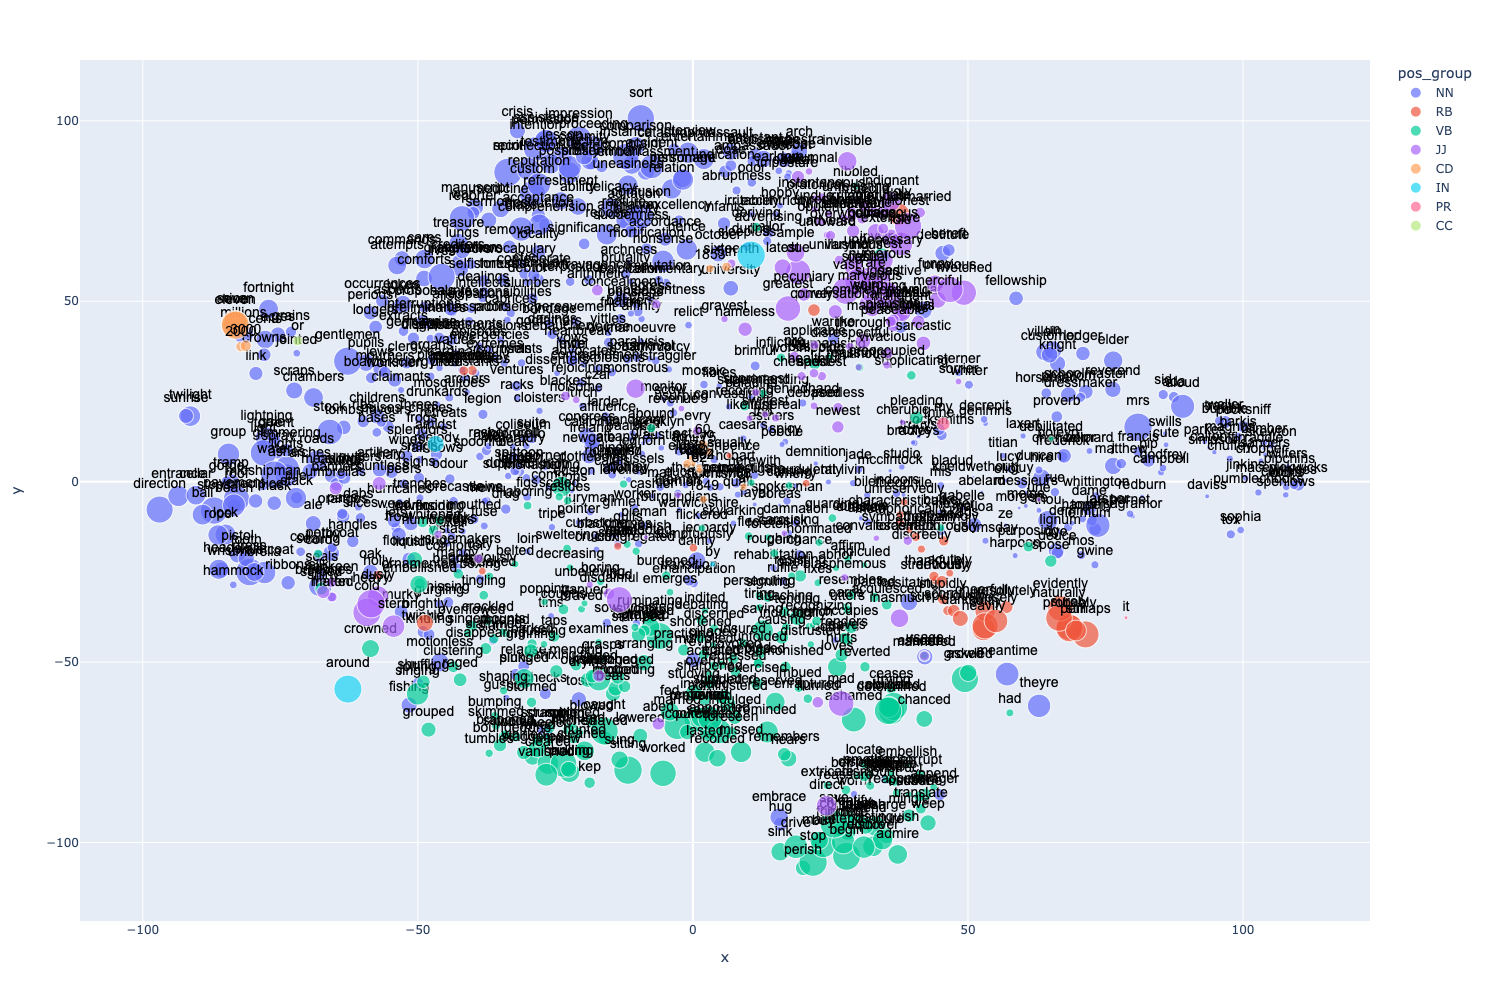

In [37]:
px.scatter(COORDS.reset_index().sample(1000), 
           'x', 'y', 
           text='term_str', 
           color='pos_group', 
           hover_name='term_str',          
           size='dfidf',           
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

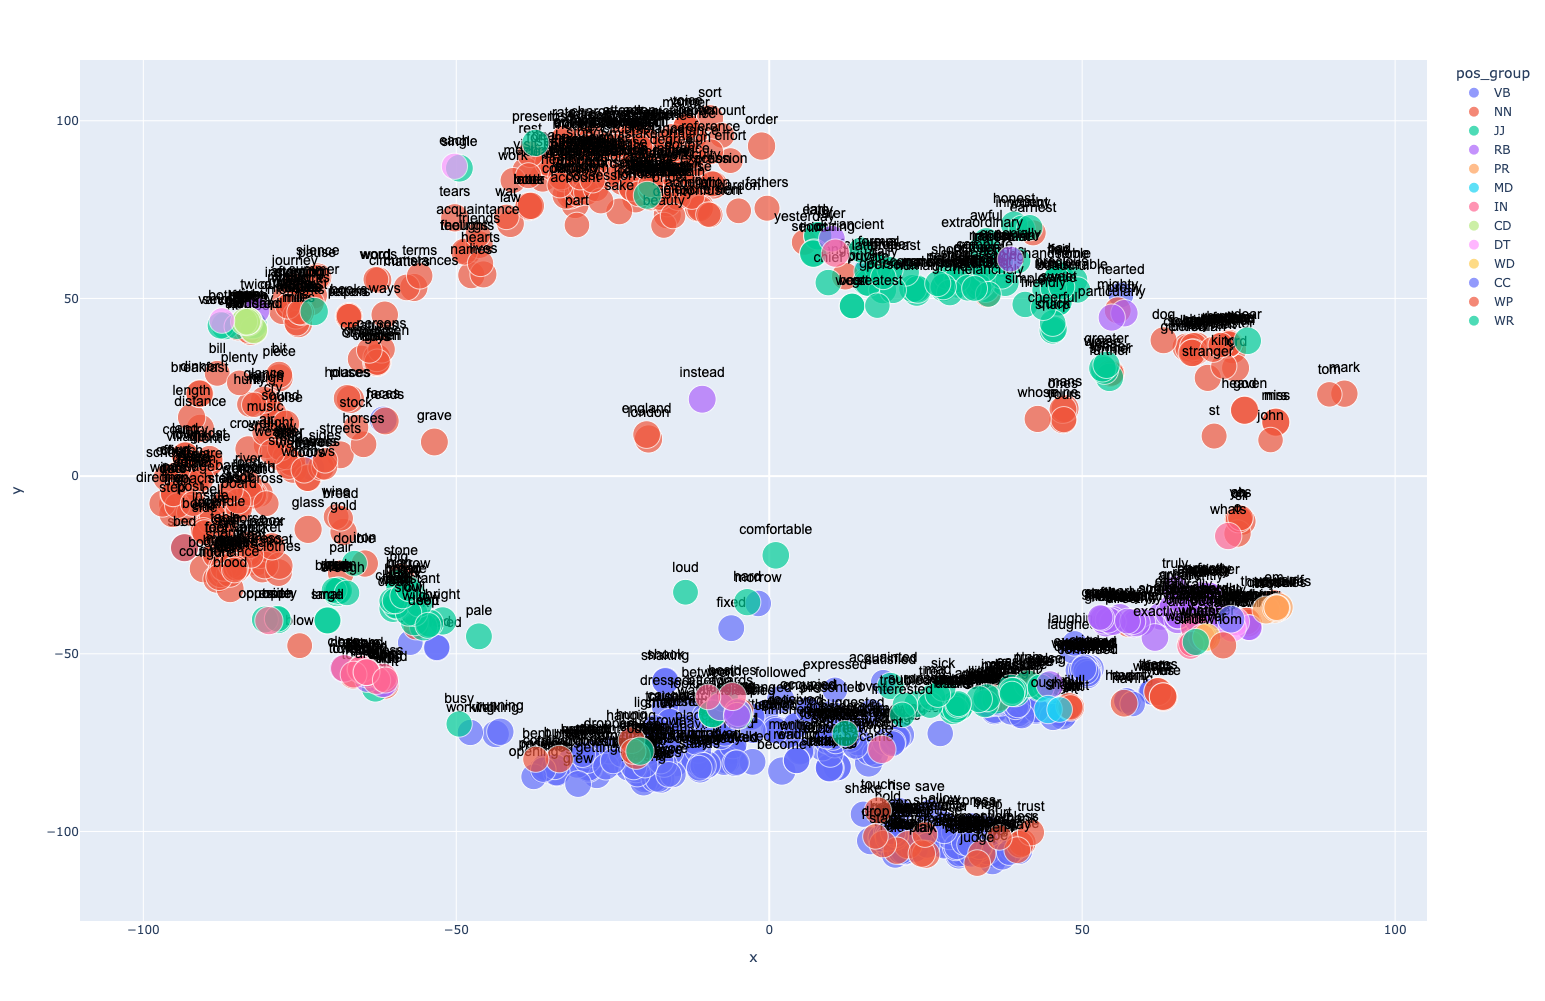

In [38]:
px.scatter(COORDS.reset_index().sort_values('dfidf', ascending=False).head(1000), 
           'x', 'y', 
           text='term_str', 
           color='pos_group', 
           hover_name='term_str',          
           size='dfidf',           
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

#### **With Nouns Only (not proper ones)**

In [53]:
noun_COORDS = COORDS.loc[COORDS.pos_group == 'NN']

noun_COORDS

x          y   n       dfidf pos_group     log_n
term_str                                                          
04         0.542611   5.074944  10   20.322264        NN  2.302585
08         0.813468   5.348079  10   11.161132        NN  2.302585
350      -83.536514  36.456417  24   78.392038        NN  3.178054
87         2.034327   5.669988  14   51.457016        NN  2.639057
89         1.161920   5.738420  15   44.196019        NN  2.708050
...             ...        ...  ..         ...       ...       ...
zone     -32.028049   2.642661  12   78.392038        NN  2.484907
zu        60.205723  -7.450152  22   28.728508        NN  3.091042
zulu     -13.550667  38.664394  12   58.476439        NN  2.484907
à         74.929085   4.147956  94  125.841724        NN  4.543295
était     61.743019  -4.612803  13   11.161132        NN  2.564949

[13143 rows x 6 columns]

#### **Noun tSNE plot**

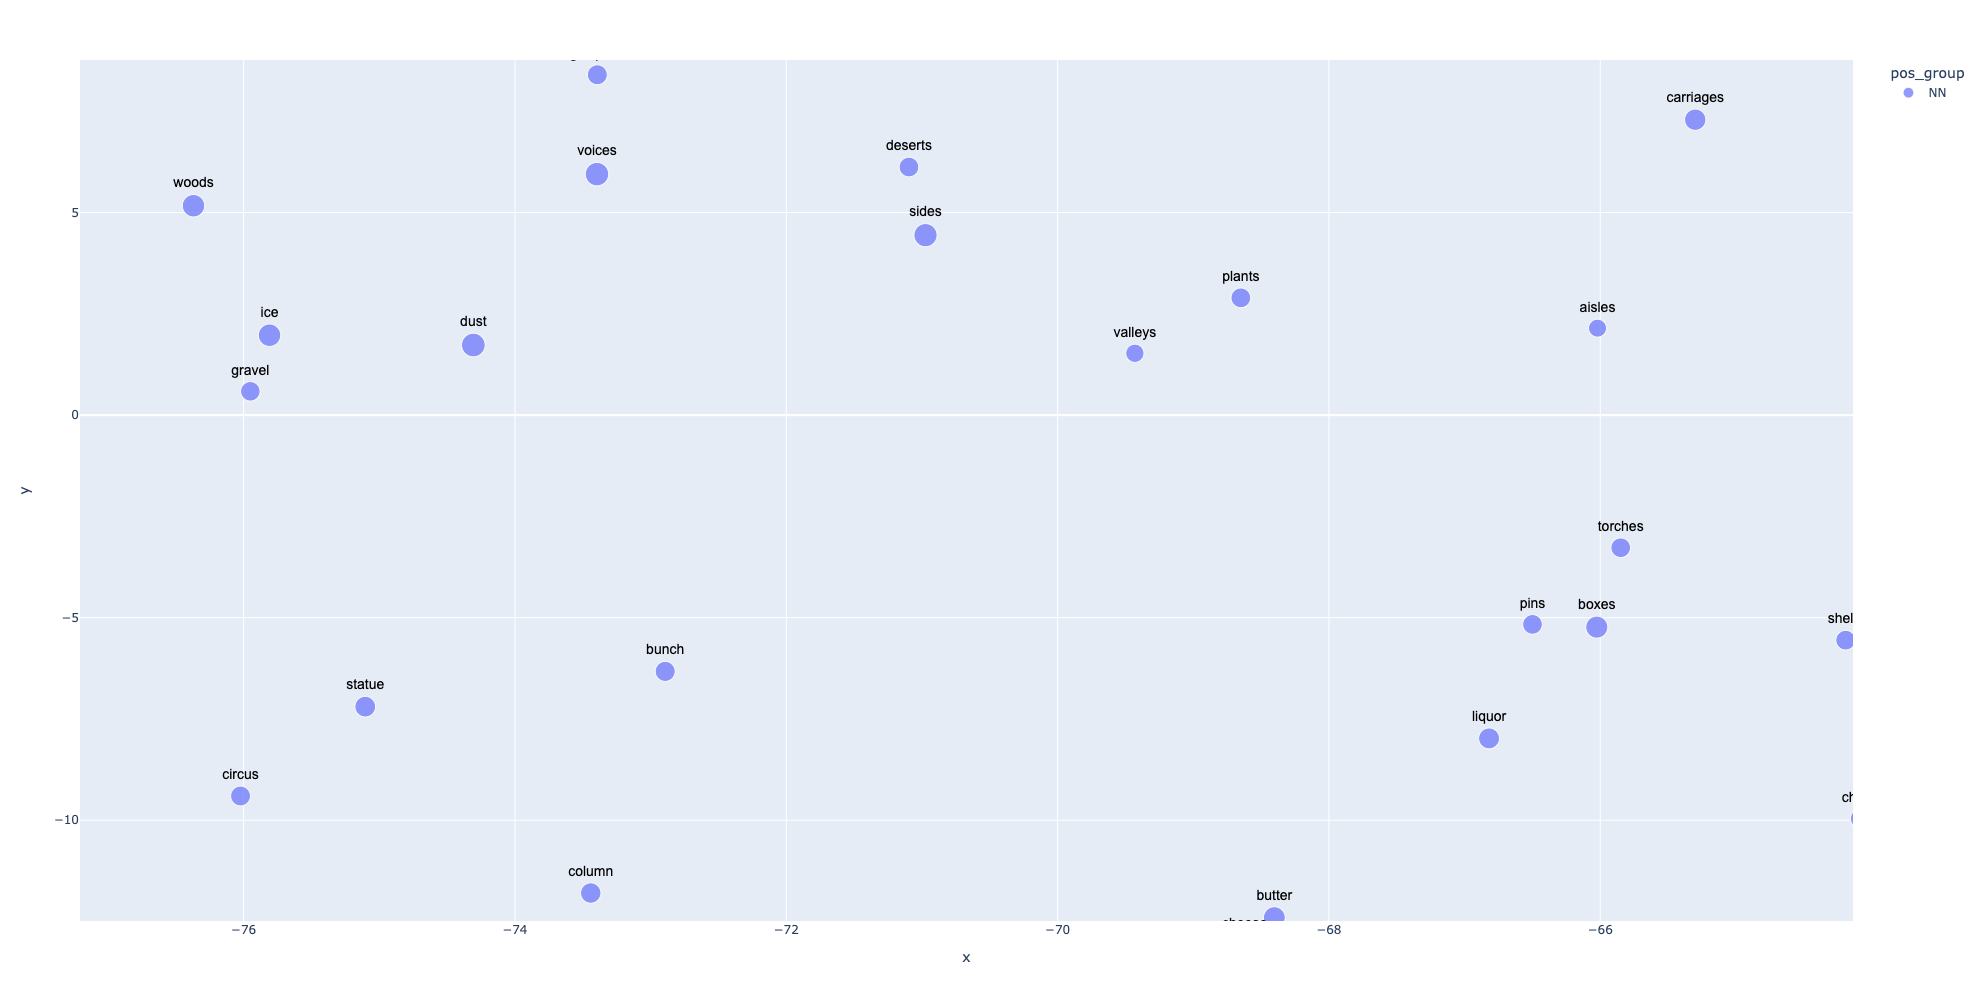

In [54]:
px.scatter(noun_COORDS.reset_index().sample(1000), 
           'x', 'y', 
           text='term_str', 
           color='pos_group', 
           hover_name='term_str',
           size = 'log_n',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

#### **Clusters in Nouns Plot**
* luggage, country, town, borough, inn, tent $\rightarrow$ travel
* nostrils, knuckles, wrist, sleeve, armor, grip $\rightarrow$ battle, struggle??
* scavengers, hostlers, philanthropists, presbyterians, architects, wayfarers $\rightarrow$ occupation, action, charity??
* dissensions, swindlers, aims, rivals, foes $\rightarrow$ enmity, opposition
* woods, ice, gravel, dust, deserts, valleys, plants $\rightarrow$ nature, outdoors

### **Analogies and Similarities (vector algebra)**

In [39]:
def complete_analogy(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

In [40]:
complete_analogy('man', 'boy', 'woman', 3)

term       sim
0   girl  0.851387
1   baby  0.768748
2  child  0.764450

In [41]:
complete_analogy('girl', 'daughter', 'boy', 3)

term       sim
0     son  0.806970
1   niece  0.796292
2  nephew  0.792255

In [42]:
complete_analogy('girl', 'sister', 'boy', 3)

term       sim
0    niece  0.803975
1   nephew  0.780578
2  brother  0.761206

In [43]:
complete_analogy('man', 'gentleman', 'woman', 5)

term       sim
0         lady  0.837602
1         girl  0.756685
2  housekeeper  0.730277
3        widow  0.726901
4       matron  0.669566

In [44]:
complete_analogy('woman', 'lady', 'man', 5)

term       sim
0  gentleman  0.824193
1     person  0.687966
2    student  0.618382
3  clergyman  0.597353
4     lawyer  0.588978

In [45]:
complete_analogy('day', 'sun', 'night', 5)

term       sim
0      moon  0.758980
1      rain  0.719536
2       sky  0.714280
3  sunlight  0.712312
4    clouds  0.711592

In [57]:
complete_analogy('king', 'money', 'servant', 5)

term       sim
0     purse  0.618348
1  lodgings  0.538427
2     meals  0.536840
3  medicine  0.535820
4  property  0.535807

In [58]:
complete_analogy('king', 'royal', 'servant', 5)

term       sim
0    keepers  0.603850
1    cabinet  0.594091
2   boarding  0.564780
3    private  0.564711
4  ladyships  0.561722

In [67]:
complete_analogy('king', 'rich', 'servant', 5)

term       sim
0      nice  0.608984
1    shabby  0.604531
2  handsome  0.594732
3    clever  0.577550
4    sturdy  0.547286

In [68]:
complete_analogy('lord', 'rich', 'servant', 5)

term       sim
0  shabby  0.655889
1    lazy  0.580029
2    tall  0.578269
3    clad  0.566695
4  sailor  0.561728

In [71]:
complete_analogy('man', 'journey', 'woman', 5)

term       sim
0      voyage  0.678766
1        trip  0.639491
2  pilgrimage  0.582225
3       visit  0.535242
4    marriage  0.534133

In [72]:
complete_analogy('woman', 'marriage', 'man', 5)

term       sim
0    commission  0.621347
1         trial  0.615661
2  introduction  0.601732
3      petition  0.596050
4       request  0.594801

In [73]:
complete_analogy('man', 'property', 'woman', 5)

term       sim
0   affairs  0.570672
1    estate  0.568760
2  religion  0.567143
3   society  0.564692
4    rights  0.558945

In [74]:
complete_analogy('man', 'fool', 'woman', 5)

term       sim
0    devil  0.663740
1  villain  0.663168
2     girl  0.662057
3  creetur  0.660398
4   beggar  0.653608

In [75]:
complete_analogy('woman', 'fool', 'man', 5)

term       sim
0   vagabond  0.561235
1      thief  0.558269
2  foreigner  0.557487
3      devil  0.557404
4    villain  0.556923

In [76]:
complete_analogy('man', 'wise', 'woman', 5)

term       sim
0     brave  0.642014
1  innocent  0.607824
2    clever  0.591082
3   foolish  0.579697
4    minded  0.575066

In [77]:
complete_analogy('woman', 'wise', 'man', 5)

term       sim
0  reasonable  0.554601
1        sane  0.533982
2    superior  0.519525
3      useful  0.519105
4    rational  0.509219

## Similarites

In [46]:
get_most_similar('joy')

term       sim
0      delight  0.778237
1        grief  0.755719
2       terror  0.754897
3    gratitude  0.746084
4   admiration  0.743671
5     gladness  0.729121
6   bitterness  0.727012
7       horror  0.711439
8  earnestness  0.698146
9         rage  0.697935

In [47]:
get_most_similar('man')

term       sim
0  gentleman  0.824611
1     person  0.804918
2      woman  0.780459
3    student  0.718592
4  foreigner  0.698749
5        dog  0.664404
6   creature  0.659028
7        boy  0.656878
8       chap  0.649437
9    soldier  0.648450

In [48]:
get_most_similar(positive=['man'], negative=['woman'])

term       sim
0  diplomatic  0.262227
1        mark  0.260356
2        line  0.251799
3         men  0.246355
4       point  0.236271
5     express  0.231483
6    transact  0.229944
7      patent  0.225700
8     further  0.225159
9      record  0.224411

In [49]:
get_most_similar(positive='woman')

term       sim
0       girl  0.859669
1        man  0.780459
2   creature  0.777335
3       lady  0.759753
4        boy  0.735077
5     wretch  0.728275
6  gentleman  0.722586
7     rascal  0.721813
8       chap  0.712864
9      widow  0.702231

In [50]:
get_most_similar(positive=['woman'], negative=['man'])

term       sim
0     jane  0.476249
1    sweet  0.452006
2  peasant  0.427259
3  weeping  0.420330
4     mary  0.416504
5     baby  0.409885
6     girl  0.401163
7   eldest  0.397838
8    buxom  0.397097
9    sally  0.395690

In [51]:
get_most_similar(['man','woman'],['boy','girl'])

term       sim
0     gentleman  0.331652
1       outward  0.317353
2         moral  0.316811
3        person  0.288236
4      material  0.287824
5       himself  0.286915
6         crime  0.286068
7          sane  0.280468
8  indifference  0.270962
9    prosperous  0.270836

In [59]:
get_most_similar('knowledge')

term       sim
0    experience  0.746146
1        theory  0.725863
2         ideas  0.721126
3         power  0.716801
4        wisdom  0.712457
5   imagination  0.711024
6        design  0.709023
7  recollection  0.708704
8        belief  0.706114
9    profession  0.706039

In [60]:
get_most_similar('kindness')

term       sim
0      gratitude  0.717582
1       devotion  0.710808
2         homage  0.709736
3  condescension  0.696773
4      fortitude  0.696501
5     generosity  0.696357
6     friendship  0.696182
7       fidelity  0.695630
8    forgiveness  0.695235
9      affection  0.692774

In [61]:
get_most_similar('adventure')

term       sim
0        event  0.794039
1      episode  0.781311
2   engagement  0.779032
3    interview  0.772411
4     incident  0.764948
5     anecdote  0.752455
6   exposition  0.752424
7    absurdity  0.750883
8   enterprise  0.747795
9  performance  0.743935

In [78]:
get_most_similar('poor')

term       sim
0   miserable  0.638907
1    wretched  0.638791
2      wicked  0.615074
3        sick  0.604765
4     foolish  0.601449
5  friendless  0.590747
6       silly  0.584538
7     peasant  0.579586
8       brave  0.578708
9     darling  0.575868

In [80]:
get_most_similar('money')

term       sim
0     trouble  0.681588
1        food  0.657160
2        debt  0.618269
3    purchase  0.603006
4    property  0.599279
5       wages  0.586387
6      reward  0.582792
7    security  0.576184
8        bill  0.565190
9  employment  0.563871

In [79]:
get_most_similar('rich')

term       sim
0      healthy  0.670826
1       clever  0.637012
2  picturesque  0.627724
3      thirsty  0.616304
4        tough  0.599806
5         pure  0.598837
6      colored  0.591493
7       hungry  0.588078
8         prim  0.587944
9        showy  0.585651

# Save

In [52]:
# W2V.to_csv(f'{data_home}/{data_prefix}/{data_prefix}-W2V.csv')
# VOCAB.to_csv(f'{data_home}/{data_prefix}/{data_prefix}-VOCAB.csv')
# SENTS.to_csv(f'{data_home}/{data_prefix}/{data_prefix}-GENSIM_DOCS.csv')

#### **Sources**

* Dropping multiple columns by name starting with `drop` and `loc`: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
* Adding a new index level from the columns of a dataframe: https://stackoverflow.com/questions/14744068/prepend-a-level-to-a-pandas-multiindex